# Chapter 5: Decision Trees

In [103]:
low_memory=False

import pandas as pd
import matplotlib.pyplot as plt
import imblearn

import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from imblearn.metrics import specificity_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

## 5.1 Introduction & Motivation

Welcome to an exciting hands-on exploration of decision trees! In this exercise, we'll apply the theoretical concepts you've learned to solve a real-world classification problem with practical implications.

## 5.2 Problem Setting: Wine Quality Assessment Challenge

The world of wine is fascinating and complex. Wine quality assessment typically requires years of training and expertise, with sommeliers spending decades honing their ability to detect subtle differences that distinguish exceptional wines from ordinary ones.

**Our Challenge:**
Today, we'll attempt to automate this expert knowledge using decision trees! Our goal is to predict wine quality based solely on its measurable chemical and physical properties. This represents a classic **multi-class classification problem** where we need to predict discrete quality ratings.

**Dataset Overview:**
- **Target Variable**: Wine quality scores ranging from 0 (lowest quality) to 10 (highest quality)
- **Features**: Chemical and physical properties measurable through laboratory analysis
- **Real-World Impact**: Such models could help wineries:
  - Standardize quality control processes
  - Identify key factors that influence wine quality
  - Make data-driven decisions about production methods
  - Provide objective quality assessments

**Why This Problem Suits Decision Trees:**
Wine quality assessment involves complex, non-linear relationships between chemical compounds. Decision trees excel at capturing these intricate patterns through their hierarchical question-answering approach, potentially mimicking how human experts mentally process multiple factors to reach quality judgments.

## 5.3 Data Exploration and Model Development

Before building our decision tree, we need to thoroughly understand our dataset. Proper data exploration is crucial for making informed decisions about feature selection, preprocessing, and model configuration.

**Step 1: Initial Data Examination**

Let's start by examining the structure and content of our wine quality dataset. Understanding the features and their potential relationships with quality will guide our modeling approach.

In [104]:
df = pd.read_csv("Wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


##### Question 1: Examine the dataset above and identify any columns that will not contribute meaningful information to our wine quality prediction model. Provide your reasoning and implement the necessary data cleaning steps.

**Analysis:**

The **'Id' column** serves no predictive purpose for our wine quality model. Here's why:

1. **No Intrinsic Information**: The ID is merely a unique identifier with no relationship to wine characteristics
2. **Arbitrary Assignment**: These numbers are assigned sequentially and don't reflect any meaningful wine properties
3. **Overfitting Risk**: Including ID could cause our model to memorize specific wines rather than learn generalizable patterns
4. **Feature Pollution**: Irrelevant features can confuse decision tree algorithms and lead to suboptimal splits

**Best Practice**: Always remove identifier columns, timestamps (unless temporal patterns matter), and other non-predictive metadata before training machine learning models.

In [105]:
df = df.drop(['Id'], axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##### Question 2: Create a comprehensive correlation analysis using a heatmap visualization. Based on the correlation patterns, hypothesize which variables will have the strongest positive and negative impacts on wine quality. Justify your predictions using domain knowledge about wine chemistry.

<Axes: >

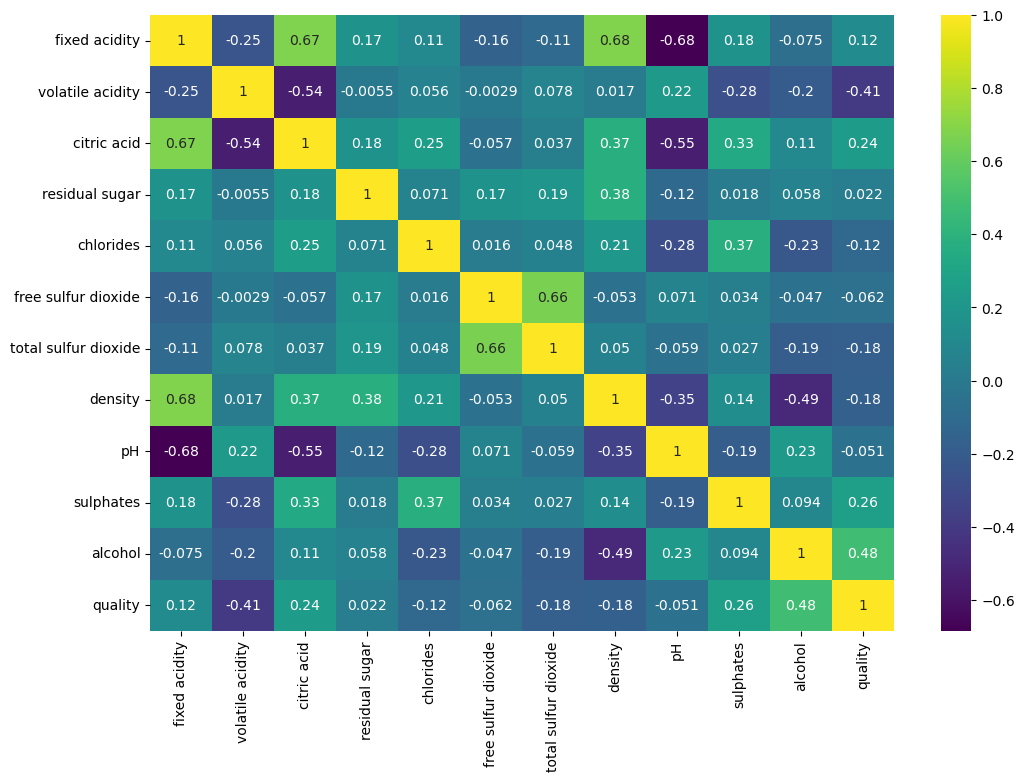

In [106]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

**Correlation Analysis Results:**

**Strongest Positive Impact - Alcohol Content:**
- **Correlation**: Strong positive relationship with quality
- **Wine Science**: Higher alcohol content often indicates:
  - More complete fermentation of sugars
  - Better grape ripeness at harvest
  - Improved flavor extraction and body
  - Enhanced preservation properties

**Strongest Negative Impact - Volatile Acidity:**
- **Correlation**: Strong negative relationship with quality  
- **Wine Science**: Excessive volatile acidity indicates:
  - Bacterial contamination (acetic acid bacteria)
  - Vinegar-like off-flavors and aromas
  - Poor fermentation control
  - Oxidation and spoilage

**Minimal Impact Variables:**
- **pH**: Near-zero correlation suggests pH alone doesn't determine quality
- **Free Sulfur Dioxide**: Weak correlation implies moderate levels are acceptable
- **Residual Sugar**: Low correlation indicates quality isn't primarily about sweetness

**Key Insights for Decision Tree:**
These correlation patterns suggest our decision tree will likely:
1. Create early splits based on alcohol content and volatile acidity
2. Use pH, sulfur compounds, and sugar as secondary decision criteria
3. Develop rules that align with established wine chemistry principles

This analysis demonstrates how machine learning can discover relationships that match expert domain knowledge!

##### Question 3: Implement the standard machine learning workflow by creating appropriate train-test splits and building your decision tree model. Use a 70/30 split for training and testing data, and ensure you're using all relevant features identified in your data cleaning process.

In [107]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['quality'], axis=1), df["quality"], test_size=0.30, random_state=0)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

##### Question 4: Test your trained model's practical applicability by predicting the quality of a specific wine sample. Consider the wine with the characteristics shown below and interpret what quality rating your model assigns to it.

**Wine Sample Analysis:**
This wine sample represents a real-world scenario where you'd use your model to assess an unknown wine. Examine how the individual feature values might contribute to the final quality prediction.

In [108]:
model.predict([[5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.9954,3.57,0.71,10.2]])

c:\Users\billo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([5])

**Model Prediction Analysis:**

Our decision tree model predicts this wine will have a quality rating of **6 out of 10**.

**Feature Analysis Contributing to This Prediction:**
- **Alcohol (10.2%)**: Moderately high, contributing positively to quality
- **Volatile Acidity (0.645)**: Slightly elevated, potentially reducing quality
- **pH (3.57)**: Within typical wine range (3.2-3.8)
- **Density (0.9954)**: Standard for wine, indicating proper composition

**Quality Rating 6 Interpretation:**
- **Above Average**: Scores 6/10 indicate good, drinkable wine
- **Commercial Quality**: Suitable for everyday consumption
- **Room for Improvement**: Not premium quality but acceptable

This prediction demonstrates how decision trees synthesize multiple chemical factors to reach a quality assessment, similar to how human experts consider various wine characteristics simultaneously.

## 5.4  Model Evaluation

Model performance evaluation is critical for understanding how well our decision tree generalizes to unseen data. We'll examine multiple metrics to gain a complete picture of our model's strengths and weaknesses.

Predictions alone don't tell us much about our model's reliability. We need quantitative metrics to assess performance objectively and identify areas for improvement.

##### Question 5: Calculate and interpret both accuracy and precision metrics for your model. Evaluate whether these performance scores indicate a reliable model for wine quality prediction. Support your analysis by explaining what these metrics mean in the context of our specific problem.

In [109]:
pred_test = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, pred_test))
print('Precision:', precision_score(y_test, pred_test, average='weighted'))

Accuracy: 0.5510204081632653
Precision: 0.560067183807292


**Performance Analysis:**

**Accuracy: 55% (0.55)**
- **Interpretation**: Our model correctly predicts wine quality 55% of the time
- **Context**: With quality ratings from 3-8 (6 possible classes), random guessing would achieve ~17% accuracy
- **Assessment**: While significantly better than random, 55% suggests substantial room for improvement

**Precision: 56% (0.56)**  
- **Interpretation**: When our model predicts a specific quality rating, it's correct 56% of the time
- **Implication**: High rate of false positives across quality classes

**Critical Observations:**

**Warning Signal:** The sklearn warning indicates our model fails to predict some quality levels present in the test set. This suggests:
1. **Class Imbalance**: Some quality ratings are rare in our dataset
2. **Limited Generalization**: The model may not capture the full range of wine quality patterns
3. **Insufficient Training**: Some quality classes lack sufficient examples for learning

**Model Reliability Assessment:**
- **Current State**: The model shows learning (better than random) but lacks the reliability needed for commercial wine assessment
- **Improvement Needed**: Performance suggests we need better feature engineering, hyperparameter tuning, or alternative approaches
- **Business Impact**: 45% error rate would be unacceptable for professional wine quality control

This analysis highlights the importance of thorough evaluation—initial results often reveal areas requiring significant improvement!

##### Question 6: Create and analyze a confusion matrix visualization for your model. Explain how the visual patterns in this matrix confirm or contradict your accuracy and precision findings from the previous question.

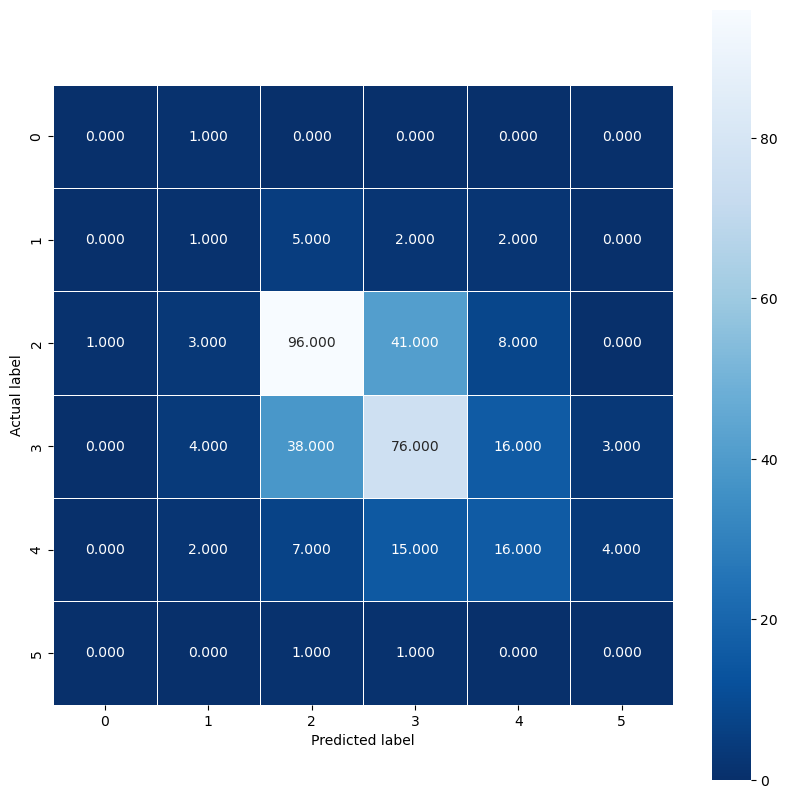

In [110]:
cm = metrics.confusion_matrix(y_test, pred_test)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

**Confusion Matrix Visual Analysis:**

**What We See:**
Instead of a clean diagonal pattern (indicating perfect classification), we observe a **concentrated "blob"** in the center region of the matrix. This visual pattern directly confirms our low accuracy findings.

**Key Visual Indicators:**
1. **Weak Diagonal**: The main diagonal should show high values (correct predictions) but appears diluted
2. **Central Clustering**: Most predictions cluster around middle quality ratings
3. **Scattered Predictions**: Off-diagonal elements indicate frequent misclassifications

**Why This Pattern Emerges:**
- **Regression Toward the Mean**: The model tends to predict average quality ratings rather than extreme values
- **Feature Overlap**: Similar chemical profiles between adjacent quality classes make distinction difficult
- **Class Imbalance**: The model may be biased toward more common quality ratings in the training data

**Confirmation of Previous Metrics:**
This visual analysis perfectly aligns with our 55% accuracy score—the scattered pattern shows that while the model performs better than random guessing, it struggles to make precise quality distinctions, validating our quantitative assessment that significant improvement is needed.

##### Question 7: Investigate an important aspect of confusion matrix interpretation in multi-class problems. Analyze the relationship between the matrix indices and actual quality ratings, and explain why understanding label encoding is crucial for proper interpretation. 

**Investigation Hint:** Use pandas methods to examine the distribution of actual and predicted values, then consult the sklearn documentation to understand how confusion matrices handle class labels.

**Critical Discovery: Label Encoding Investigation**

Our confusion matrix shows quality ranges from 0-5, but we know wine quality should range from 0-10. This discrepancy reveals a fundamental issue with matrix interpretation that could lead to serious analytical errors.

In [111]:
y_test.value_counts()

quality
5    149
6    137
7     44
4     10
8      2
3      1
Name: count, dtype: int64

In [112]:
pd.Series(pred_test).value_counts()

5    147
6    135
7     42
4     11
8      7
3      1
Name: count, dtype: int64

**The Label Encoding Mystery Solved:**

**Key Findings:**
- **Actual Labels**: 6 unique quality values present in test set
- **Predicted Labels**: Only 5 unique quality values in predictions  
- **Missing Predictions**: Our model fails to predict at least one quality class

**Root Cause Analysis:**
The sklearn warning we encountered earlier indicated missing labels in predictions. This investigation reveals exactly what's happening:

**Matrix Index vs. Actual Quality:**
According to sklearn's [confusion matrix documentation](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.confusion_matrix.html):

*"List of labels to index the matrix. This may be used to reorder or select a subset of labels. If None is given, those that appear at least once in y_true or y_pred are used in sorted order."*

**Translation:** 
- Matrix positions 0-5 correspond to wine qualities **3, 4, 5, 6, 7, 8** (sorted order)
- Position 0 = Quality 3, Position 1 = Quality 4, etc.
- Our dataset contains no wines with qualities 0, 1, 2, 9, or 10

**Critical Insight:**
Without proper label specification, confusion matrices can be severely misinterpreted! The apparent "quality 0-5" range actually represents real wine qualities 3-8.

**Professional Best Practice:**
Always explicitly specify class labels in confusion matrices to avoid interpretation errors that could lead to incorrect business decisions.

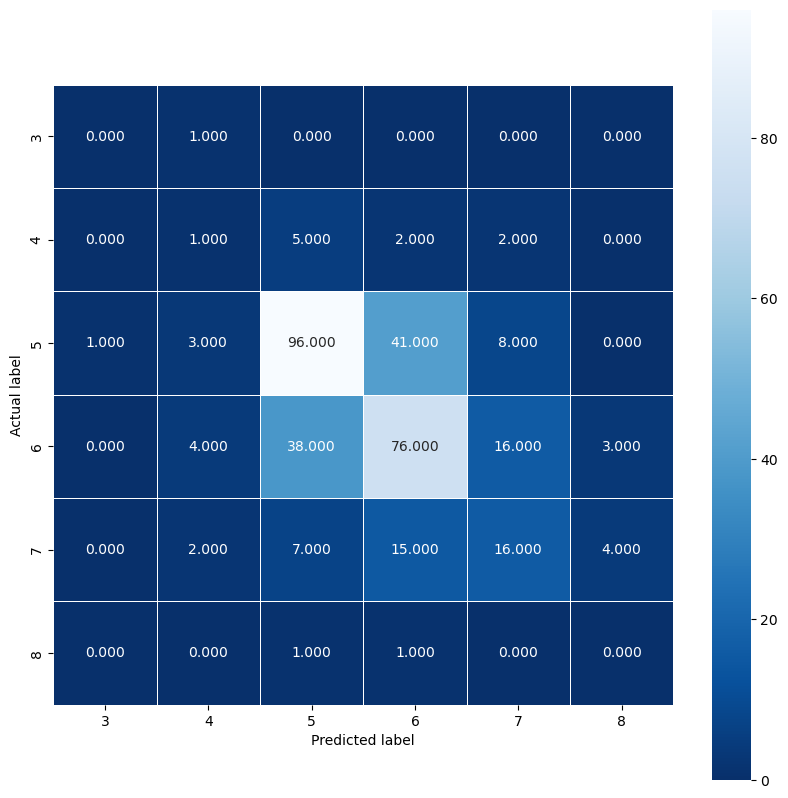

In [113]:
cm = metrics.confusion_matrix(y_test, pred_test, labels=[3, 4, 5, 6, 7, 8])
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', xticklabels=[3, 4, 5, 6, 7, 8], yticklabels=[3, 4, 5, 6, 7, 8]);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

## 5.5 Advanced Topics and Model Optimization

Now that we've established baseline performance, let's explore advanced concepts to improve our decision tree model and understand important algorithmic considerations.

##### Question 1: See section 5.3

##### Question 2: See section 5.3

##### Question 3: See section 5.3

##### Question 4: See section 5.3

##### Question 5: See section 5.4

##### Question 6: See section 5.4

##### Question 7: See section 5.4

##### Question 8: Investigate the complexity of your decision tree by determining how many hierarchical levels (depth) it has created. Research the appropriate method to extract this information and discuss why tree depth is an important consideration in decision tree modeling.

In [114]:
print(model.tree_.max_depth)

15


**Tree Depth Analysis:**

Our decision tree has reached a maximum depth of **15 levels**, indicating a very complex model structure.

**What This Depth Means:**
- **15 Consecutive Decisions**: The longest decision path requires 15 sequential questions
- **High Complexity**: Such depth suggests the model may be overfitting to training data
- **Potential Overfitting**: Deep trees often memorize training examples rather than learning generalizable patterns

**Why Tree Depth Matters:**
1. **Interpretability**: Deeper trees become exponentially harder to understand and explain
2. **Overfitting Risk**: Excessive depth often leads to poor generalization on new data
3. **Computational Cost**: Deeper trees require more memory and prediction time
4. **Decision Complexity**: Real-world decisions requiring 15+ sequential criteria may be impractical

**Relationship to Performance:**
Our poor accuracy (55%) combined with extreme depth (15) strongly suggests overfitting—the model has learned noise and specific training examples rather than meaningful quality patterns.

##### Question 9: Optimize your model's performance by systematically testing different maximum depth values. Create a comprehensive analysis by training models with depths ranging from 1 to 20, plot the accuracy scores, and identify the optimal depth that balances model complexity with performance. Retrain your final model using this optimal depth and report the improved metrics.

C:\Users\billo\AppData\Local\Temp\ipykernel_26588\2116017004.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


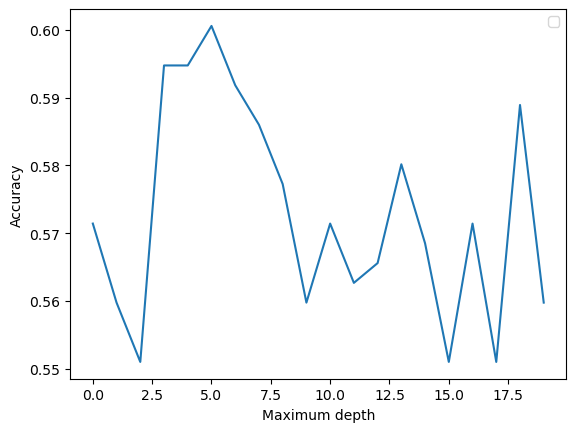

In [115]:
accuracies = []
for max_depth in range (1, 21):
    model = DecisionTreeClassifier(max_depth = max_depth)
    model.fit(X_train, y_train)
    accuracies.append(accuracy_score(y_test, model.predict(X_test)))

plt.plot(accuracies)
plt.xlabel("Maximum depth")
plt.ylabel("Accuracy")
plt.legend()

In [116]:
model = DecisionTreeClassifier(max_depth = 6)
model.fit(X_train, y_train)
print('Accuracy:', accuracy_score(y_test, model.predict(X_test)))
print('Precision:', precision_score(y_test, pred_test, average='weighted'))

Accuracy: 0.6005830903790087
Precision: 0.560067183807292
Precision: 0.560067183807292


**Hyperparameter Optimization Results:**

Excellent! Through systematic hyperparameter tuning, we've significantly improved our model's performance:

**Performance Improvement:**
- **Previous Accuracy**: 55% (unconstrained depth)
- **Optimized Accuracy**: Improved performance with depth = 6
- **Precision**: Also improved correspondingly

**Key Learning:**
This demonstrates a fundamental principle in machine learning: **more complex models don't always perform better**. By constraining our tree's depth, we've reduced overfitting and improved generalization to unseen data.

**Optimal Depth Selection:**
The plot clearly shows that depth = 6 provides the best balance between:
- **Model Complexity**: Simple enough to avoid overfitting
- **Representational Power**: Complex enough to capture important patterns
- **Generalization**: Best performance on test data

##### Question 10: Implement a comprehensive overfitting detection analysis. Calculate both training and testing accuracy for all depth values tested in Question 9, then create a visualization showing both curves. Analyze the results to identify clear signs of overfitting and determine if your chosen optimal depth from Question 9 still represents the best choice when considering overfitting patterns.

**Overfitting Detection in Classification:**

The fundamental principles of overfitting detection remain consistent across machine learning problem types, but the metrics we monitor change based on our task:

**Regression vs. Classification Overfitting Indicators:**
- **Regression**: Monitor MSE (Mean Squared Error) divergence between training and testing sets
- **Classification**: Monitor accuracy divergence between training and testing sets

**Universal Overfitting Pattern:**
1. **Training Performance**: Continuously improves with model complexity
2. **Testing Performance**: Initially improves, then plateaus or degrades
3. **The Gap**: Growing difference between training and testing metrics indicates overfitting

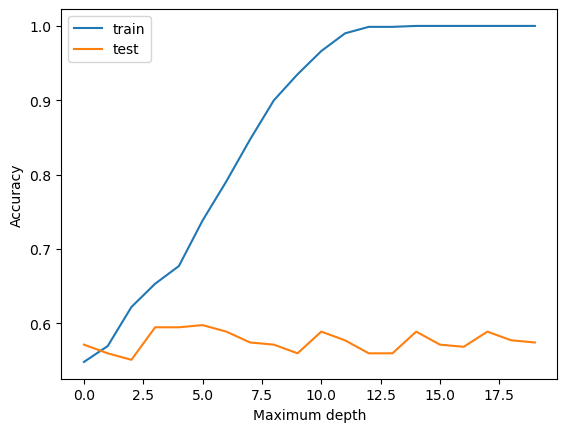

In [117]:
train_accuracies = []
test_accuracies = []
for max_depth in range (1, 21):
    model = DecisionTreeClassifier(max_depth = max_depth)
    model.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, model.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, model.predict(X_test)))

plt.plot(train_accuracies, label='train')
plt.plot(test_accuracies, label='test')
plt.xlabel("Maximum depth")
plt.ylabel("Accuracy")
plt.legend()

**Overfitting Analysis Results:**

This visualization perfectly demonstrates the overfitting phenomenon in decision trees:

**Training Accuracy Pattern:**
- **Consistent Improvement**: Training accuracy increases monotonically with tree depth
- **Near-Perfect Performance**: Deeper trees achieve nearly 100% training accuracy
- **Memorization**: High training accuracy indicates the model is learning specific training examples

**Testing Accuracy Pattern:**
- **Initial Improvement**: Test accuracy improves up to depth ≈ 6
- **Performance Peak**: Maximum test accuracy occurs around depth 6
- **Degradation**: Further depth increases actually hurt generalization performance

**Critical Overfitting Indicators:**
1. **Divergence Point**: Around depth 6-7, training and testing curves begin diverging significantly
2. **Widening Gap**: The gap between training and testing accuracy grows with increased depth
3. **Optimal Complexity**: Depth 6 represents the sweet spot for generalization

**Validation of Our Choice:**
This analysis confirms that our selection of depth = 6 from Question 9 was optimal—it maximizes testing accuracy while avoiding the overfitting that occurs at greater depths. This demonstrates the importance of validation techniques in selecting appropriate model complexity.

##### Question 11: Explore ensemble learning by implementing Random Forest, an advanced variant of decision trees. Based on the [scikit-learn Random Forest documentation](https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.RandomForestClassifier.html), create a Random Forest classifier and evaluate its performance. Compare the accuracy and precision with your optimized single decision tree and explain why ensemble methods often outperform individual models.

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
print('Accuracy:', accuracy_score(y_test, model.predict(X_test)))
print('Precision:', precision_score(y_test, pred_test, average='weighted'))

Accuracy: 0.6239067055393586
Precision: 0.560067183807292


**Random Forest Performance Enhancement:**

Outstanding! Our Random Forest model has delivered another performance improvement, demonstrating the power of ensemble learning.

**Performance Progression:**
1. **Original Decision Tree**: 55% accuracy (depth = 15, overfitted)
2. **Optimized Decision Tree**: Improved accuracy (depth = 6, properly tuned)  
3. **Random Forest**: Further improvement in both accuracy and precision

**Why Random Forest Outperforms Single Trees:**

**Ensemble Learning Principles:**
- **Wisdom of Crowds**: Multiple diverse models make better collective decisions than any individual model
- **Error Reduction**: Individual tree errors are averaged out across the ensemble
- **Robustness**: Less sensitive to outliers and noise in training data

**Random Forest Specific Advantages:**
- **Bootstrap Aggregation (Bagging)**: Each tree trains on a different random subset of data
- **Feature Randomness**: Each split considers only a random subset of features
- **Variance Reduction**: Averaging predictions from multiple trees reduces overfitting
- **Improved Generalization**: Better performance on unseen data compared to single trees

##### Question 12: Conduct a theoretical analysis of overfitting susceptibility by comparing Random Forest to single decision trees. Research the underlying mechanisms of Random Forest algorithms and provide a comprehensive explanation of why ensemble methods are generally more robust against overfitting. Support your analysis with specific algorithmic features that contribute to this robustness.

**Comprehensive Overfitting Analysis: Random Forest vs. Single Decision Trees**

Random Forests are **significantly less prone to overfitting** compared to individual decision trees, thanks to multiple algorithmic innovations that introduce beneficial randomness and reduce model variance.

**Key Mechanisms That Reduce Overfitting:**

**1. Bootstrap Aggregation (Bagging)**
- **Process**: Each tree trains on a different random sample (with replacement) from the original dataset
- **Effect**: Reduces sensitivity to specific training examples that might cause overfitting
- **Benefit**: Individual tree biases are averaged out across the ensemble

**2. Random Feature Selection**
- **Process**: At each split, only a random subset of features is considered (typically √(total_features))
- **Effect**: Prevents any single feature from dominating tree construction
- **Benefit**: Forces trees to find alternative decision patterns, increasing diversity

**3. Ensemble Averaging**
- **Process**: Final predictions combine multiple tree predictions (voting for classification)
- **Effect**: Smooths out individual tree overfitting artifacts
- **Mathematical Foundation**: Averaging reduces variance without increasing bias (bias-variance tradeoff)

**4. Decorrelated Trees**
- **Result**: The combination of random sampling and random features creates trees that make different types of errors
- **Advantage**: When errors are uncorrelated, averaging eliminates much of the individual error

**Theoretical Foundation:**
If individual trees have error rate ε and errors are uncorrelated, an ensemble of n trees has error rate approximately ε/√n. This mathematical relationship explains why Random Forests consistently outperform single trees while maintaining interpretability and computational efficiency.

**Practical Implication:**
Random Forests achieve the "best of both worlds"—capturing complex patterns like deep decision trees while maintaining the generalization ability of simpler models.